# BrainStation Capstone Project
### Project: Stock Level Prediction Using Sales Data from SAP Business One ERP
### Author: Cristhian Lima
### Year: 2024

# Table of Contents
1. [Project Overview](#project-overview)
    - [Introduction](#introduction)
    - [Business Case](#business-case)
    - [Business Problem](#business-problem)
    - [Objectives](#objectives)
    - [Expected Outcome](#expected-outcome)
2. [Dataset](#dataset)
    - [Dataset Gathering](#dataset-gathering)
    - [Data Dictionary](#data-dictionary)
3. [Exploration and Preprocessing](#exploration-and-preprocessing)
    - [Data Cleaning](#data-cleaning)
    - [Exploratory Data Analysis (EDA)](#data-analysis)
    - [Sales Over Time Analysis](#sales-analysis)
    - [Customer Analysis](#customer-analysis)
    - [Product Analysis](#product-analysis)
    - [Correlation Analysis](#correlation-analysis)
4. [Model Approach](#model-dev)
    - [Projected Inventory Based on Averages](#avg-projected)
    - [Projected Inventory Linear Regression](#lr-projected)
    - [Projected Inventory Decision Tree](#tree-projected)
5. [Model Improvement](#model-imp)

# **SPRING 1**

# 1. Project Overview <a class="anchor" id="project-overview"></a>

## Introduction <a class="anchor" id="introduction"></a>
Efficient inventory management is a challenge for many businesses, as maintaining the right stock levels is critical to balance supply and demand. Overstocking can lead to increased holding costs and wasted resources, while stockouts can result in lost sales, poor customer satisfaction, and potential damage to the company’s reputation.

This project aims to develop a predictive model to optimize stock levels using historical sales data from SAP Business One.

By leveraging SAP Business One USA demo database ten years of invoice data (2006-2016), we will analyze sales trends, customer purchasing behavior, and product demand to forecast optimal stock levels for each item.

## Business Case <a class="anchor" id="business-case"></a>
OEC Computers is a company located in the United States, specializing in the purchase and distribution of technological products. With a solid track record in the market, OEC has successfully expanded its operations nationally, as well as to markets in Canada and Europe. Over the years, the company has accumulated sales data from 2006 to 2016, which represents a valuable source of information for understanding market trends and product demand.

## Business Problem <a class="anchor" id="business-problem"></a>
The lack of accurate demand forecasting can lead to misinformed purchasing and replenishment decisions, creating inefficiencies in the supply chain.

## Objectives <a class="anchor" id="objectives"></a>
1. **Data Exploration and Preprocessing:** Clean and prepare the dataset, ensuring that it is suitable for predictive analysis by addressing missing data, inconsistencies, and outliers.

2. **Sales Pattern Analysis:** Perform Exploratory Data Analysis (EDA) to identify patterns, in sales, which will help in understanding demand behavior.

3. **Model Development:** Use machine learning and time-series forecasting techniques to predict future demand and establish optimal stock levels for the business.

4. **Evaluation and Optimization:** Evaluate the model’s performance using appropriate metrics, refine the model to improve accuracy, and provide actionable insights for stock management.

## Expected Outcome: <a class="anchor" id="expected-outcome"></a>
By the end of the project, we expect to create a predictive tool that will enable the business to optimize its inventory levels, reduce costs, and improve overall supply chain efficiency. The insights gained from this model will support data-driven decision-making and enhance the company’s ability to meet customer demands with more precision.

# 2. Dataset <a class="anchor" id="dataset"></a>

## Dataset Gathering <a class="anchor" id="dataset-gathering"></a>

The dataset consists of sales data from the **SAP Business One USA demo database**.
csv file: https://github.com/alk1316/Capstone_BrainsStation_SAP_InventoryLevel/blob/main/notebooks/SalesData.csv

Below is a query and table that describes the fields used in the invoice query, providing detailed information about each column, its purpose, and the table it originates from.

```
SELECT
    T0."DocEntry",  -- Internal Id Invoice
    T0."DocNum",    -- Invoice Number
    T0."CardCode",  -- Customer Code
    T0."CardName",  -- Customer Name
    T2."GroupCode", -- Customer Group Code
    T4."GroupName", -- Customer Group Name
    T2."Country",  -- Customer Country Code
    T5."Name" "CountryName", -- Customer Country Name
    T2."State1",  -- Customer State Code
    T6."Name" "StateName", -- Customer State Name
    T2."City",   -- Customer City
    T0."DocDate", -- Invoice Date
    T0."SlpCode", -- Sale Employee Code
    T0."DocCur", -- Invoice currency
    T0."DocRate", -- Invoice currency rate
    T0."DocTotal", -- Invoice Total in Main Currency USD
    T0."DocTotalFC", -- Invoice Total in Foreign Currency
    T1."ItemCode", -- Item Code
    T3."ItmsGrpCod", -- Item Group Code
    T7."ItmsGrpNam", -- Item Group Name
    T3."ItemName", -- Item Description
    T1."Quantity", -- Quantity sold
    T1."WhsCode", -- Warehouse code
    T1."StockPrice", -- Cost of item in Invoice
    T1."PriceBefDi", -- Price before discount Invoiced
    T1."DiscPrcnt",  -- Discount per item in Invoice
    T1."Price",  -- Price after discount Invoiced
    T1."LineTotal" -- Total per Line in Main Currency USD (quatity per price after discount)

FROM "OINV" T0
INNER JOIN "INV1" T1 ON T0."DocEntry" = T1."DocEntry"
INNER JOIN "OCRD" T2 ON T0."CardCode" = T2."CardCode"
INNER JOIN "OITM" T3 ON T1."ItemCode" = T3."ItemCode"
INNER JOIN "OCRG" T4 ON T2."GroupCode" = T4."GroupCode"
INNER JOIN "OCRY" T5 ON T2."Country" = T5."Code"
LEFT JOIN "OCST" T6 ON T2."State1" = T6."Code"
INNER JOIN "OITB" T7 ON T3."ItmsGrpCod" = T7."ItmsGrpCod"

WHERE
    T0."DocType" = 'I' -- Only Item Invoices
    AND (T0."DocDate" >= '20060101' AND T0."DocDate" <= '20161231') -- Range of data provided by SAP in DEMO DB
ORDER BY T0."DocNum"

```

## Data Dictionary <a class="anchor" id="data-dictionary"></a>

| Column            | Description                                                                                         | Table   |
|-------------------|-----------------------------------------------------------------------------------------------------|---------|
| `T0."DocEntry"`   | Unique identifier for the invoice. This is the internal ID used in the system to reference the invoice. | OINV    |
| `T0."DocNum"`     | Invoice number assigned to the document. This is the number typically used for referencing invoices in reports and communications. | OINV    |
| `T0."CardCode"`   | Code that identifies the customer in the system. This is a unique identifier for each customer.       | OINV    |
| `T0."CardName"`   | Name of the customer as registered in the system. It corresponds to the company's or individual’s official name. | OINV    |
| `T2."GroupCode"`  | Code representing the customer group, used to categorize customers into different segments (e.g., retail, wholesale, etc.). | OCRD    |
| `T4."GroupName"`  | Descriptive name of the customer group, providing a more user-friendly label for the group code.     | OCRG    |
| `T2."Country"`    | Code representing the country of the customer, often using ISO standards for country codes.          | OCRD    |
| `T5."Name"`       | Full name of the country corresponding to the country code, giving a human-readable version of the customer's location. | OCRY    |
| `T2."State1"`     | Code representing the state or province of the customer, used in regions where such administrative divisions exist. | OCRD    |
| `T6."Name"`       | Full name of the state or province, corresponding to the state code. Provides a human-readable location identifier. | OCST    |
| `T2."City"`       | City where the customer is located, providing more granular geographic detail of the customer's address. | OCRD    |
| `T0."DocDate"`    | Date the invoice was created or issued. This is the official date of the transaction for accounting and auditing purposes. | OINV    |
| `T0."SlpCode"`    | Code that identifies the sales employee responsible for the invoice. This is used for tracking sales by representative. | OINV    |
| `T0."DocCur"`     | Currency in which the invoice was issued (e.g., USD, EUR), specifying the monetary unit for the transaction. | OINV    |
| `T0."DocRate"`    | Exchange rate applied if the invoice currency differs from the company’s main currency, showing the conversion factor. | OINV    |
| `T0."DocTotal"`   | Total amount of the invoice in the company's main currency (USD), including all charges and taxes. | OINV    |
| `T0."DocTotalFC"` | Total amount of the invoice in the foreign currency (if applicable), providing the total cost in the currency used for the transaction. | OINV    |
| `T1."ItemCode"`   | Code that uniquely identifies the item being sold, as registered in the inventory system.            | INV1    |
| `T3."ItmsGrpCod"` | Code representing the item group, categorizing items into different segments (e.g., electronics, clothing, etc.). | OITM    |
| `T7."ItmsGrpNam"` | Descriptive name of the item group, providing a human-readable label for the item group code.        | OITB    |
| `T1."ItemName"` | Description of the item, typically containing the item’s full name and additional details. | OITM    |
| `T1."Quantity"`   | Number of units sold of the item. Represents the quantity of the product included in the invoice.     | INV1    |
| `T1."WhsCode"`    | Code representing the warehouse from which the item is being shipped or managed. Helps track inventory across multiple locations. | INV1    |
| `T1."StockPrice"` | Cost of the item at the time of the invoice, based on stock valuation methods (e.g., FIFO, LIFO), used for cost analysis. | INV1    |
| `T1."PriceBefDi"` | Price of the item before any discounts are applied. This is the base price charged for the product.   | INV1    |
| `T1."DiscPrcnt"`  | Percentage discount applied to the item on the invoice. Represents the discount provided to the customer for that specific item. | INV1    |
| `T1."Price"`      | Final price of the item after the discount is applied. This is the amount that will be invoiced to the customer. | INV1    |
| `T1."LineTotal"`  | Total amount for the line item in the invoice, calculated as `Quantity * Price`, representing the total charge for that product in the invoice currency. | INV1    |

# 3. Exploration and Preprocessing <a class="anchor" id="exploration-and-preprocessing"></a>

## Data Cleaning <a class="anchor" id="data-cleaning"></a>

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('SalesData.csv', delimiter=';')
df.head()

,DocEntry,DocNum,CardCode,CardName,GroupCode,GroupName,Country,CountryName,State1,StateName,...,ItmsGrpCod,ItmsGrpNam,ItemName,Quantity,WhsCode,StockPrice,PriceBefDi,DiscPrcnt,Price,LineTotal
0,1,1,C20000,Norm Thompson,103,Distributors,US,USA,PA,Pennsylvania,...,103,Accessories,IBM Infoprint 1312,5,1,370.03,600,0,600,"3,000"
1,1,1,C20000,Norm Thompson,103,Distributors,US,USA,PA,Pennsylvania,...,113,Agro,IBM Infoprint 1222,5,1,185.81,300,0,300,"1,500"
2,1,1,C20000,Norm Thompson,103,Distributors,US,USA,PA,Pennsylvania,...,101,J.B. Printers,J.B. Officeprint 1186,5,1,285.92,450,0,450,"2,250"
3,1,1,C20000,Norm Thompson,103,Distributors,US,USA,PA,Pennsylvania,...,102,Rainbow Printers,Rainbow Color Printer 5.0,5,1,486.02,750,0,750,"3,750"
4,1,1,C20000,Norm Thompson,103,Distributors,US,USA,PA,Pennsylvania,...,102,Rainbow Printers,Rainbow Color Printer 7.5,5,1,385.22,600,0,600,"3,000"


In [4]:
df.shape

(3494, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DocEntry     3494 non-null   object 
 1   DocNum       3494 non-null   object 
 2   CardCode     3494 non-null   object 
 3   CardName     3494 non-null   object 
 4   GroupCode    3494 non-null   int64  
 5   GroupName    3494 non-null   object 
 6   Country      3494 non-null   object 
 7   CountryName  3494 non-null   object 
 8   State1       3494 non-null   object 
 9   StateName    3494 non-null   object 
 10  City         3494 non-null   object 
 11  DocDate      3494 non-null   object 
 12  SlpCode      3494 non-null   int64  
 13  DocCur       3494 non-null   object 
 14  DocRate      3494 non-null   float64
 15  DocTotal     3494 non-null   object 
 16  DocTotalFC   3494 non-null   object 
 17  ItemCode     3494 non-null   object 
 18  ItmsGrpCod   3494 non-null   int64  
 19  ItmsGr

Converts specified columns in a DataFrame to int, float, or date, and optionally strips whitespace from column names.

Parameters:
* df (pd.DataFrame): The DataFrame containing the data.
* columns_to_int (list): List of column names to be converted to int.
* columns_to_float (list): List of column names to be converted to float.
* columns_to_date (list): List of column names to be converted to datetime.
* clean_column_names (bool): Whether to strip leading/trailing whitespace from column names.

Returns:
pd.DataFrame: The DataFrame with the specified columns converted and column names cleaned.

In [6]:
# Function to clean data

import pandas as pd

def columns_to_convert(df, columns_to_int=None, columns_to_float=None, columns_to_date=None, clean_column_names=True):

    # Clean column names by stripping whitespace
    if clean_column_names:
        df.columns = df.columns.str.strip()

    # Convert columns to int
    if columns_to_int:
        for col in columns_to_int:
            df[col] = df[col].str.replace(',', '').astype(int)

    # Convert columns to float
    if columns_to_float:
        for col in columns_to_float:
            df[col] = df[col].str.replace(',', '').astype(float)

    # Convert columns to date
    if columns_to_date:
        for col in columns_to_date:
            df[col] = pd.to_datetime(df[col])

    return df

In [7]:
# Applying the function to all the columns to be transformed
df = columns_to_convert(df,
                        columns_to_int=['DocEntry', 'DocNum' ],
                        columns_to_float=['DocTotal', 'DocTotalFC', 'LineTotal', 'StockPrice', 'PriceBefDi', 'Price'],
                        columns_to_date=['DocDate'])

<ipython-input-6-72d5938fdec6>:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3494 entries, 0 to 3493
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DocEntry     3494 non-null   int64         
 1   DocNum       3494 non-null   int64         
 2   CardCode     3494 non-null   object        
 3   CardName     3494 non-null   object        
 4   GroupCode    3494 non-null   int64         
 5   GroupName    3494 non-null   object        
 6   Country      3494 non-null   object        
 7   CountryName  3494 non-null   object        
 8   State1       3494 non-null   object        
 9   StateName    3494 non-null   object        
 10  City         3494 non-null   object        
 11  DocDate      3494 non-null   datetime64[ns]
 12  SlpCode      3494 non-null   int64         
 13  DocCur       3494 non-null   object        
 14  DocRate      3494 non-null   float64       
 15  DocTotal     3494 non-null   float64       
 16  DocTot

In [9]:
# Searching for Null Vales
df.isnull().sum()

,0
DocEntry,0
DocNum,0
CardCode,0
CardName,0
GroupCode,0
GroupName,0
Country,0
CountryName,0
State1,0
StateName,0


Reviewing the items, there are items like MRP_Item1, MRP_Item2 and others that do not make much sense since they do not refer to a specific product.

In this case, it would be important to understand with the business the functionality of this article in order to treat it appropriately.

For this analysis I am going to exclude it from the dataframe and only leave articles with a description of a real product.

In [10]:
# List of items in the dataset
df['ItemName'].unique()

array(['IBM Infoprint 1312', 'IBM Infoprint 1222',
       'J.B. Officeprint 1186', 'Rainbow Color Printer 5.0',
       'Rainbow Color Printer 7.5', 'Rainbow 1200 Laser Series',
       'Printer Label', 'Server Point 10000', 'Motherboard BTX',
       'Memory Chip', 'PC - 8x core, DDR 32GB, 2TB HDD',
       'Motherboard MicroATX', 'Mouse USB', 'Memory DDR RAM 8GB',
       'Computer Monitor 24" HDMI', 'Keyboard Comfort USB',
       'PC - 12x core, 64GB, 5 x 150GB SSD', 'PC Set 1', 'PC Set 2',
       'Quadcore CPU 3.4 GHz', 'Hard Disk 3TB', 'Gigabit Network Card',
       'Tower Case with Power supply', 'WLAN Card',
       'Blu-Ray Disc 10-Pack', 'Blu-Ray DL Disc 10-Pack',
       'USB Flashdrive 128GB', 'USB Flashdrive 256GB',
       'J.B. Laptop Batteries X1 series',
       'J.B. Laptop Batteries X2 series',
       'Rainbow Printer 9.5 Inkjet Cartridge',
       'Rainbow Nuance Ink 6-Pack and Photo Paper Kit',
       'SLR PreciseShot PX1500', 'SLR M-CAM 40C', 'KG USB Travel Hub',
       'KG 

In [11]:
# List with items to be removed from the Dataframe
items_to_remove = ['MRP_Item1', 'MRP_Child2', 'MRP_Item4', 'MRP_Item2', 'MRP_Grandchild', 'MRP_Item3', 'MRP_Item5', 'MRP_BOM','MRP_Child1']

In [12]:
# Removing items that do not apply for analysis
df = df[~df['ItemName'].isin(items_to_remove)]

In [13]:
# verifying the deletion of items in the list 'items_to_remove'
df['ItemName'].unique()

array(['IBM Infoprint 1312', 'IBM Infoprint 1222',
       'J.B. Officeprint 1186', 'Rainbow Color Printer 5.0',
       'Rainbow Color Printer 7.5', 'Rainbow 1200 Laser Series',
       'Printer Label', 'Server Point 10000', 'Motherboard BTX',
       'Memory Chip', 'PC - 8x core, DDR 32GB, 2TB HDD',
       'Motherboard MicroATX', 'Mouse USB', 'Memory DDR RAM 8GB',
       'Computer Monitor 24" HDMI', 'Keyboard Comfort USB',
       'PC - 12x core, 64GB, 5 x 150GB SSD', 'PC Set 1', 'PC Set 2',
       'Quadcore CPU 3.4 GHz', 'Hard Disk 3TB', 'Gigabit Network Card',
       'Tower Case with Power supply', 'WLAN Card',
       'Blu-Ray Disc 10-Pack', 'Blu-Ray DL Disc 10-Pack',
       'USB Flashdrive 128GB', 'USB Flashdrive 256GB',
       'J.B. Laptop Batteries X1 series',
       'J.B. Laptop Batteries X2 series',
       'Rainbow Printer 9.5 Inkjet Cartridge',
       'Rainbow Nuance Ink 6-Pack and Photo Paper Kit',
       'SLR PreciseShot PX1500', 'SLR M-CAM 40C', 'KG USB Travel Hub',
       'KG 

# 4. Exploratory Data Analysis (EDA) <a class="anchor" id="data-analysis"></a>

Next, an exploratory analysis will be conducted to understand the trends and patterns in the data:

Sales Analysis:

* Analyze how sales are distributed over time.
* Customer Analysis: Total sold per customers over time.
* Product Analysis: Most sold products and trends.
* Correlations: Analyze the correlations with sales to identify which factors influence demand.

## Sales Over Time Analysis <a class="anchor" id="sales-analysis"></a>

In [14]:
# Total Sales per year Table
sales_per_year = df.groupby([df['DocDate'].dt.to_period('Y')])['DocTotal'].sum().reset_index()
sales_per_year.head(11)

,DocDate,DocTotal
0,2006,12541262.74
1,2007,7050059.15
2,2008,695481.75
3,2009,640539.21
4,2010,622886.56
5,2011,311139.44
6,2012,497231.89
7,2013,3854720.78
8,2014,14778709.32
9,2015,17160556.74


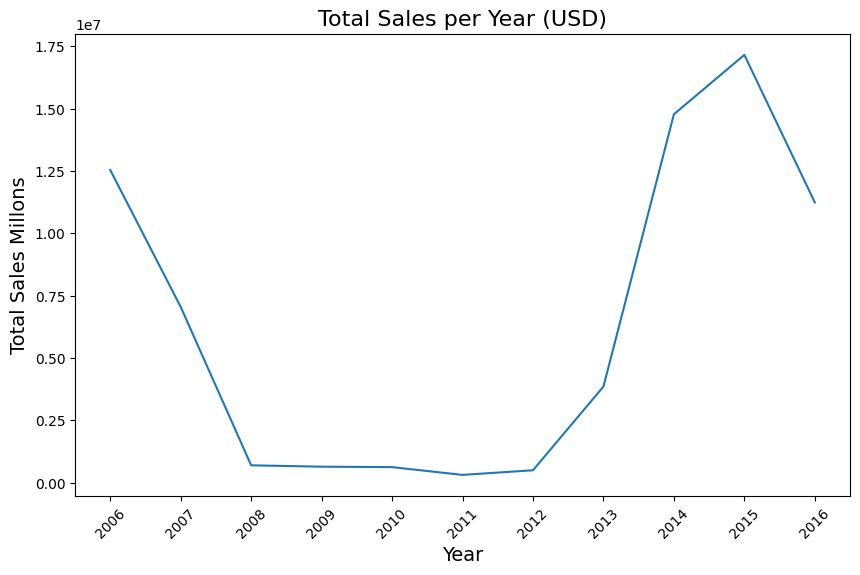

In [15]:
# Total Sales per Year Graph
plt.figure(figsize=(10, 6))
plt.plot(sales_per_year['DocDate'].astype(str), sales_per_year['DocTotal'])
plt.title('Total Sales per Year (USD)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales Millons', fontsize=14)
plt.xticks(rotation=45)
plt.show()

This chart shows the evolution of sales over the years. It can be observed that from 2006 to 2008, the sales has declined.

Starting in 2008, total sales remain at the same level until 2012, where a slight increase is seen, with peaks in billing for some customers in 2014 and 2015, and decreasing in 2016.

## Customer Analysis <a class="anchor" id="customer-analysis"></a>

### Total sales per customer

In [16]:
# Total Sales per customer
sales = df.groupby(['CardCode','CardName'])['DocTotal'].sum().reset_index()
salescust = sales.sort_values(by='DocTotal', ascending=False)
salescust

,CardCode,CardName,DocTotal
11,C99999,One Time Customer,8029024.31
6,C40000,Earthshaker Corporation,7242727.04
0,C20000,Maxi-Teq,7141070.88
3,C25000,Star Company,6805940.25
2,C23900,Parameter Technology,6635062.70
10,C70000,Aquent Systems,6485508.79
9,C60000,SG Electronics,5816242.64
4,C26000,River Inc,5375188.36
5,C30000,Microchips,4945422.64
7,C42000,Mashina Corporation,4762156.49


One Time Customer is the client with the highest sales value over the 10 years, however, this customer consolidates all customers to whom only one sale is made or sales are expected.

Sales are consolidated in 11 main clients, with total sales of between 7 to 2 million during the 10 years.

The following graph shows the total sales per customer.

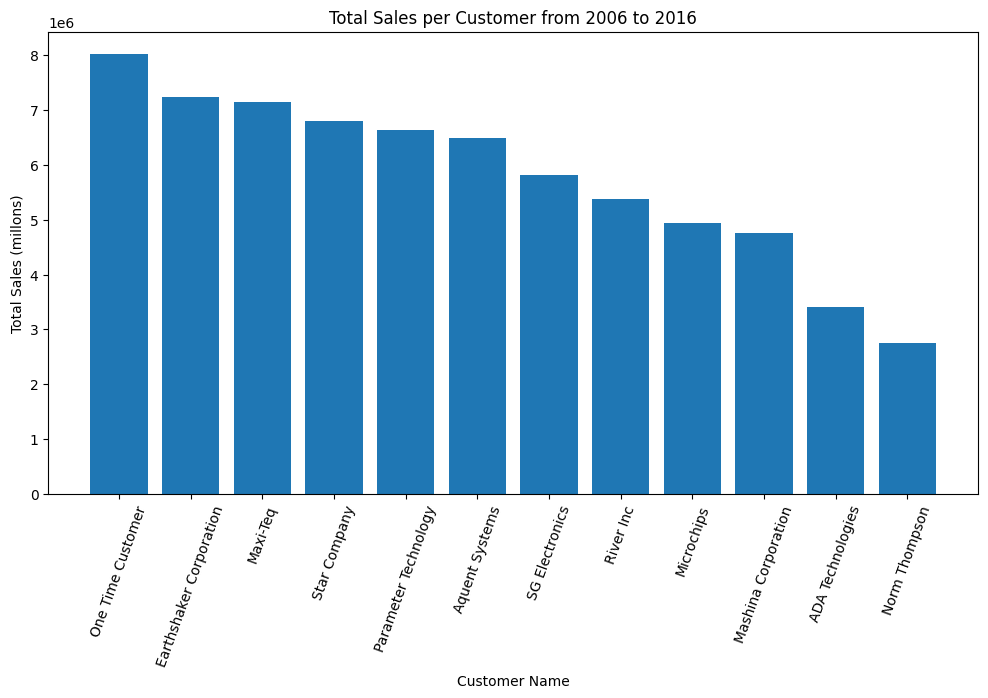

In [17]:
# Bar Chart - Total sales per customer
plt.figure(figsize=(12, 6))
plt.bar(salescust['CardName'], salescust['DocTotal'])
plt.xlabel('Customer Name')
plt.ylabel('Total Sales (millons)')
plt.title('Total Sales per Customer from 2006 to 2016')
plt.xticks(rotation=70)
plt.show()

### Sales frequency per customer

In [18]:
# Counting invoices for each customer
salesfreq = df.groupby(['CardCode', 'CardName'])['DocNum'].count().reset_index()
salesfreq.columns = ['CardCode', 'CardName', 'Frequency']
salesfreq = salesfreq.sort_values(by='Frequency', ascending=False)
salesfreq

,CardCode,CardName,Frequency
2,C23900,Parameter Technology,344
6,C40000,Earthshaker Corporation,331
7,C42000,Mashina Corporation,328
5,C30000,Microchips,313
0,C20000,Maxi-Teq,284
10,C70000,Aquent Systems,276
9,C60000,SG Electronics,274
8,C50000,ADA Technologies,271
3,C25000,Star Company,239
4,C26000,River Inc,205


In [19]:
salesfreq.describe()

,Frequency
count,12.000000
mean,251.916667
std,90.378455
min,57.000000
25%,230.500000
50%,275.000000
75%,316.750000
max,344.000000


The highest number of purchases made by a customer is 344 over the course of the years, while the minimum purchase frequency by a customer is 57 times.

'Parameter Technology' is the customer with the highest number of total purchases, amounting to 344, followed by 'Earthshaker Corporation' with 328 purchases over the 10-year period.

In contrast to the previous analysis where 'One Time Customer' was the client with the highest sales amount, in this case, they are the one with the fewest purchases, totaling 57.

Given that this 'One Time Customer' cannot be considered a regular partner, it would be advisable to conduct a more detailed analysis to understand why, despite making fewer purchases, they account for such a high sales volume.

### Total sales per customer group

In [20]:
# Sales grouped by customer group and add the total sales
salesgroup = df.groupby(['GroupCode', 'GroupName'])['DocTotal'].sum().reset_index()
salesgrp = salesgroup.sort_values(by='DocTotal', ascending=False)
salesgrp

,GroupCode,GroupName,DocTotal
3,106,High Tech,18816191.31
1,103,Distributors,18061484.57
2,104,Small Accounts,14514533.10
0,102,Large Accounts,12188149.68
4,108,Production,5816242.64


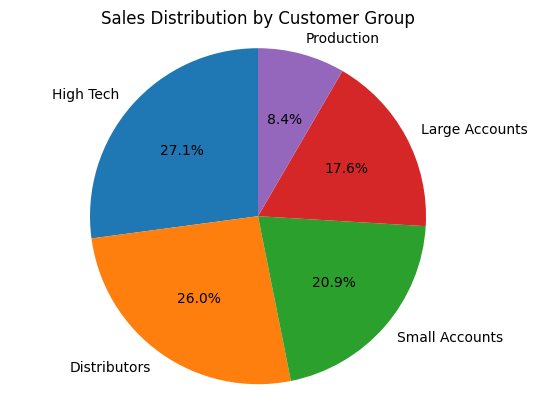

In [21]:
# Pie Chart - Percentage of sales per customer group
plt.pie(salesgrp['DocTotal'], labels=salesgrp['GroupName'], autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Customer Group')
plt.axis('equal')
plt.show()

As shown in the table and chart, customers in the 'High Tech' and 'Distributor' groups contribute just over 50% of the company's total sales, followed by customers in the 'Small Accounts' and 'Large Accounts' segments, representing 37% of sales.

Lastly, customers in the 'Production' group account for only 8.4% of total sales.

### Sales Evolution by Time per Customer

In [22]:
# Sales evolution by time per customer
# Creating sales dataframe by year and customer
sales_customer_time = df.groupby([df['DocDate'].dt.to_period('Y'), 'CardName'])['DocTotal'].sum().reset_index()
sales_customer_time.head()

,DocDate,CardName,DocTotal
0,2006,ADA Technologies,655451.02
1,2006,Aquent Systems,560105.04
2,2006,Earthshaker Corporation,547547.89
3,2006,Mashina Corporation,435156.50
4,2006,Microchips,409942.82


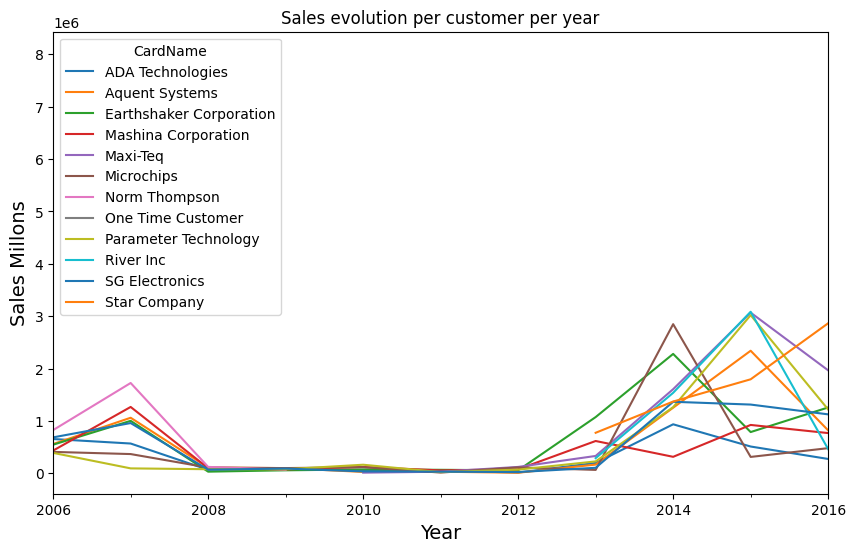

In [23]:
# Modifying dataframe form clients as columns and dates as rows
sales_customer_time = df.groupby([df['DocDate'].dt.to_period('Y'), 'CardName'])['DocTotal'].sum().unstack()

# Graph of the evolution of sales by clients and per year
sales_customer_time.plot(figsize=(10, 6), title='Sales evolution per customer per year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales Millons', fontsize=14)
plt.show()

This chart shows the evolution of sales by customer over the years. It can be observed that from 2008 all the customer maintain the same level of sales. However, from 2012 the sales start rocketing, showing high peaks in 2014 and 2015.

## Product Analysis <a class="anchor" id="product-analysis"></a>

Next, an analysis of product sales from various aspects:

* Total sales by product: Identify the products that generate the highest total sales.
* Sales frequency by product: Determine how many times each product has been sold (number of times it appears on invoices).
* Sales by product group: Analyze sales grouped by product category.
* Temporal trends by product: Examine the evolution of product sales over time.

### Top-selling products by total sales amount

In [24]:
# Top 10 sold products by amount
sales_product = df.groupby(['ItemCode', 'ItemName'])['LineTotal'].sum().reset_index()
sales_product = sales_product.sort_values(by='LineTotal', ascending=False)
top10_item_sales = sales_product.head(10)
top10_item_sales

,ItemCode,ItemName,LineTotal
45,P20002,32GB Memory Server,2373000.0
42,P10003,PC Set 1,1367640.0
43,P10004,PC Set 2,1331040.0
44,P20001,4GB Memory Server,1170625.0
40,P10001,"PC - 8x core, DDR 32GB, 2TB HDD",886680.0
41,P10002,"PC - 12x core, 64GB, 5 x 150GB SSD",851460.0
3,A00004,Rainbow Color Printer 5.0,768375.0
4,A00005,Rainbow Color Printer 7.5,589200.0
0,A00001,IBM Infoprint 1312,537600.0
13,C00007,Hard Disk 3TB,510250.0


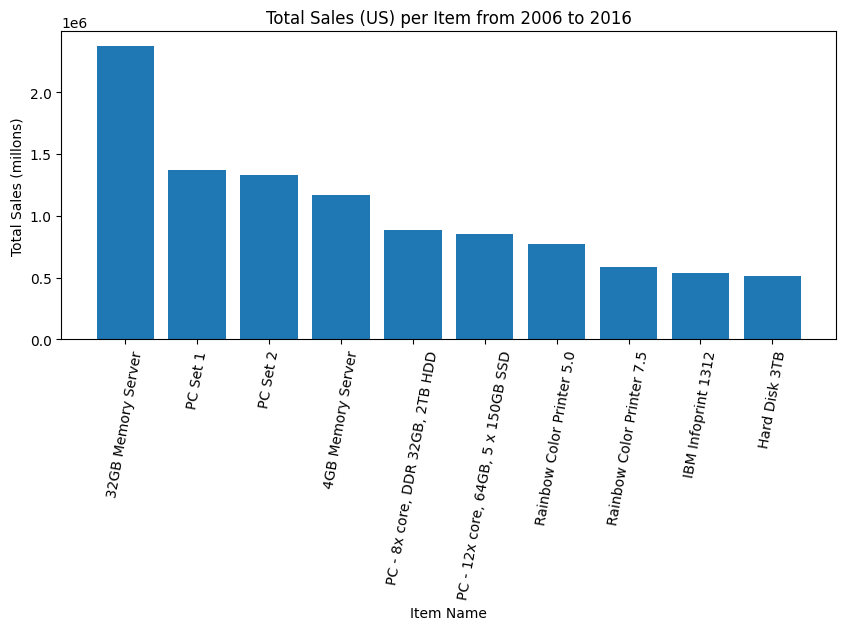

In [25]:
# Bar Chart - Total sales per item
plt.figure(figsize=(10, 4))
plt.bar(top10_item_sales['ItemName'], top10_item_sales['LineTotal'])
plt.xlabel('Item Name')
plt.ylabel('Total Sales (millons)')
plt.title('Total Sales (US) per Item from 2006 to 2016')
plt.xticks(rotation=80)
plt.show()

The top-selling product is '32GB Memory Server' with a total of approximately 2.3 million.

This is followed by products 'PC Set 1', 'PC Set 2', and '4GB Memory Server', each exceeding one million dollars in sales.

The rest of the products show total sales of less than one million, ranging between 500k and 800k in total sales

### Top-selling products by quantity sold

In [26]:
# Top 10 sold products by quantity
sales_productqt = df.groupby(['ItemCode', 'ItemName'])['Quantity'].sum().reset_index()
sales_productqt = sales_productqt.sort_values(by='Quantity', ascending=False)
top10_item_salesqt = sales_productqt.head(10)
top10_item_salesqt

,ItemCode,ItemName,Quantity
6,B10000,Printer Label,3300
36,LM4029MC,Memory Chip,1110
3,A00004,Rainbow Color Printer 5.0,1033
4,A00005,Rainbow Color Printer 7.5,1013
9,C00003,Quadcore CPU 3.4 GHz,978
2,A00003,J.B. Officeprint 1186,939
0,A00001,IBM Infoprint 1312,922
1,A00002,IBM Infoprint 1222,892
16,C00010,Mouse USB,772
8,C00002,Motherboard MicroATX,740


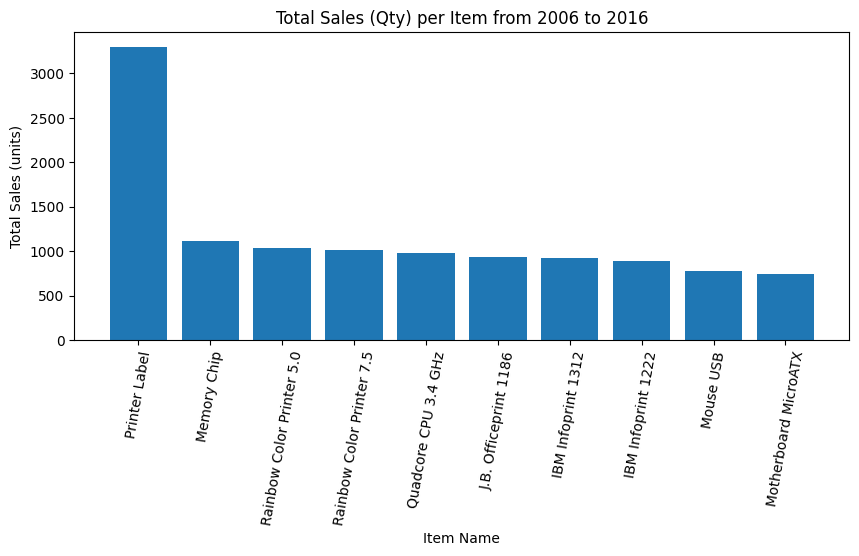

In [27]:
# Bar Chart - Top 10 sold products by quantity
plt.figure(figsize=(10, 4))
plt.bar(top10_item_salesqt['ItemName'], top10_item_salesqt['Quantity'])
plt.xlabel('Item Name')
plt.ylabel('Total Sales (units)')
plt.title('Total Sales (Qty) per Item from 2006 to 2016')
plt.xticks(rotation=80)
plt.show()

Contrary to sales by amount, the best-selling products in terms of quantity are 'Printer Label' with a total of 3,300 units, making it the top-selling product.

The next three are 'Memory Chip,' 'Rainbow Color Printer 5.0,' and 'Rainbow Color Printer 7.5,' with sales between 1,000 and 1,100 units.

The rest of the products have sales of less than 1,000 units.

### Sales by product group

In [28]:
# Total sales by product group
sales_by_itemgroup = df.groupby(['ItmsGrpCod', 'ItmsGrpNam'])['LineTotal'].sum().reset_index()
sales_by_itemgroup = sales_by_itemgroup.sort_values(by='LineTotal', ascending=False)
sales_by_itemgroup.head()

,ItmsGrpCod,ItmsGrpNam,LineTotal
0,100,Items,4062103.6
4,104,Servers,4009145.0
5,105,PC,3105780.0
2,102,Rainbow Printers,1528275.0
3,103,Accessories,578217.5


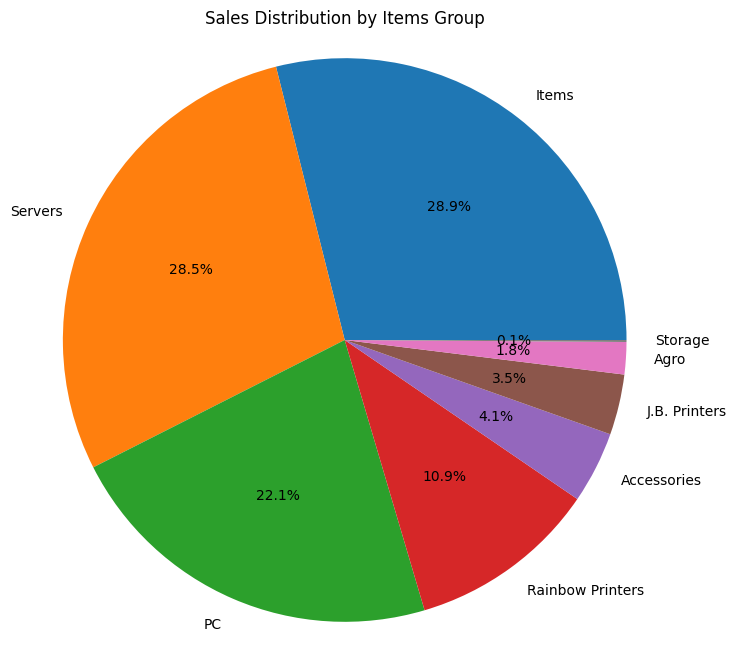

In [29]:
# Pie Chart - Percentage of sales per item group
plt.figure(figsize=(8, 8))
plt.pie(sales_by_itemgroup['LineTotal'], labels=sales_by_itemgroup['ItmsGrpNam'], autopct='%1.1f%%')
plt.title('Sales Distribution by Items Group')
plt.axis('equal')
plt.show()

The highest concentration of sales is centered on products from the Servers family at 28%, Items at 28%, and PCs at 22%.

Out of curiosity, we investigate which products belong to the Items family to validate that they are technological products and not other types of items that are not for sale.

In [30]:
validate_itemsgroups = df[df['ItmsGrpNam']=='Items']
validate_itemsgroups['ItemName'].unique()

array(['Printer Label', 'Motherboard BTX', 'Motherboard MicroATX',
       'Mouse USB', 'Memory DDR RAM 8GB', 'Computer Monitor 24" HDMI',
       'Keyboard Comfort USB', 'PC Set 2', 'Quadcore CPU 3.4 GHz',
       'Hard Disk 3TB', 'Gigabit Network Card',
       'Tower Case with Power supply', 'WLAN Card',
       'Blu-Ray Disc 10-Pack', 'Blu-Ray DL Disc 10-Pack',
       'USB Flashdrive 128GB', 'USB Flashdrive 256GB',
       'J.B. Laptop Batteries X1 series',
       'J.B. Laptop Batteries X2 series',
       'Rainbow Printer 9.5 Inkjet Cartridge',
       'Rainbow Nuance Ink 6-Pack and Photo Paper Kit',
       'SLR PreciseShot PX1500', 'SLR M-CAM 40C', 'KG USB Travel Hub',
       'KG PC-to-Mac Transfer Kit', 'LeMon 4029 Printer',
       'LeMon 4029 Printer AC Power Cord', 'LeMon 4029 Printer Head',
       'LeMon 4029 500 sheet paper drawer',
       'LeMon 4029 Printer AC Adapter', 'Travel Expense per 100 miles',
       'LeMon 4029 Printer Power Supply',
       'LeMon 4029 Printer System Boar

### Temporal trends by product and Total Amount Sold

In [31]:
# Grouping by product code and description and add up total sales
sales_per_product = df.groupby(['ItemCode', 'ItemName'])['LineTotal'].sum().reset_index()
top_5_products = sales_per_product.sort_values(by='LineTotal', ascending=False).head(5)
top_5_products

,ItemCode,ItemName,LineTotal
45,P20002,32GB Memory Server,2373000.0
42,P10003,PC Set 1,1367640.0
43,P10004,PC Set 2,1331040.0
44,P20001,4GB Memory Server,1170625.0
40,P10001,"PC - 8x core, DDR 32GB, 2TB HDD",886680.0


In [32]:
# Filter the original DataFrame to include only the top 5 best-selling products
df_top_5_products = df[df['ItemCode'].isin(top_5_products['ItemCode'])]

In [33]:
# Grouping by date (year) and product, and add total sales
sales_top_5_time = df_top_5_products.groupby([df['DocDate'].dt.to_period('Y') ,'ItemName'])['LineTotal'].sum().unstack()

# Show first results to verify
sales_top_5_time.head()

ItemName,32GB Memory Server,4GB Memory Server,"PC - 8x core, DDR 32GB, 2TB HDD",PC Set 1,PC Set 2
DocDate,,,,,
2006,NaN,NaN,53280.0,139635.0,156510.0
2007,NaN,NaN,78840.0,193575.0,124550.0
2011,NaN,NaN,8640.0,NaN,11750.0
2012,NaN,NaN,18000.0,36540.0,46060.0
2013,189750.0,9375.0,42120.0,168345.0,68150.0


This graph shows the sales trend of each of the top 10 products year by year.

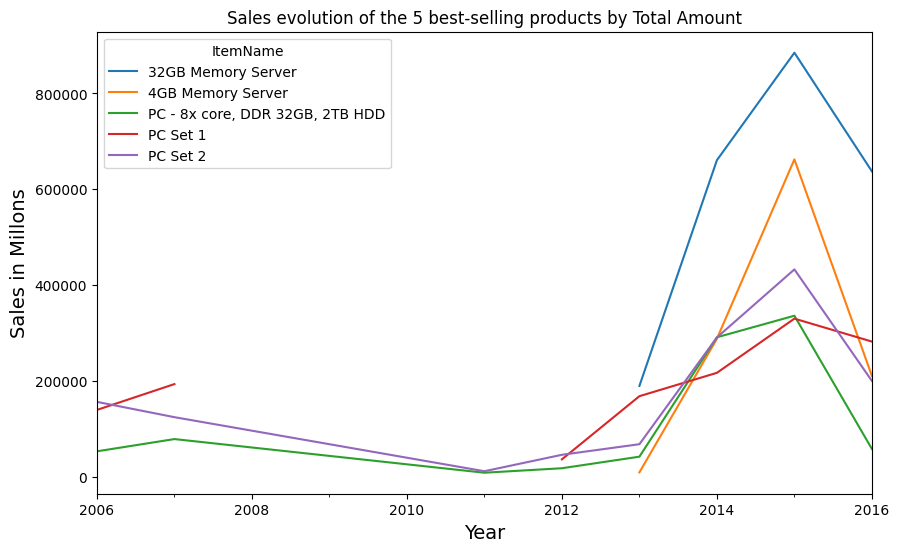

In [34]:
# Graph the evolution of sales of the 5 best-selling products by Total
sales_top_5_time.plot(figsize=(10, 6), title='Sales evolution of the 5 best-selling products by Total Amount')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in Millons', fontsize=14)
plt.show()

The five best-selling products show an increase in sales starting from 2013, reaching their peak in 2015, and exhibiting a slight decline in 2016.

The products that stand out significantly in terms of sales in 2015 are the '32GB Memory Server' and the '4GB Memory Server

The same information as interactive plot

In [35]:
# Creating an interactive chart with Plotly

import plotly.express as px

fig = px.line(df_top_5_products, x='DocDate', y='LineTotal', color='ItemName'
            #, title='Sales Trend of the 5 Best Selling Products by Total Amount'
             , labels={'DocDate': 'Date', 'LineTotal': 'Total Sales'}, markers=True)

# Configuring the layout to enable mouse wheel zoom
fig.update_layout(
    title='Sales Trend of the Top 5 Best-Selling Products by Total Amount',
    xaxis_title='Date',
    yaxis_title='Total Sales',
    dragmode='zoom',  # Allow zoom
    xaxis_rangeslider_visible=True,  # Enable range slider
    #hovermode='x',
)

# Enable scroll zoom
fig.update_traces(mode='lines+markers')

# Show the plot
fig.show()

## Correlation Analysis <a class="anchor" id="correlation-analysis"></a>

We are interested in understanding which variables influence the quantity demanded.

For this analysis, the following variables are considered:

DiscPrcnt, PriceBefDi, StockPrice, Price, Quantity.

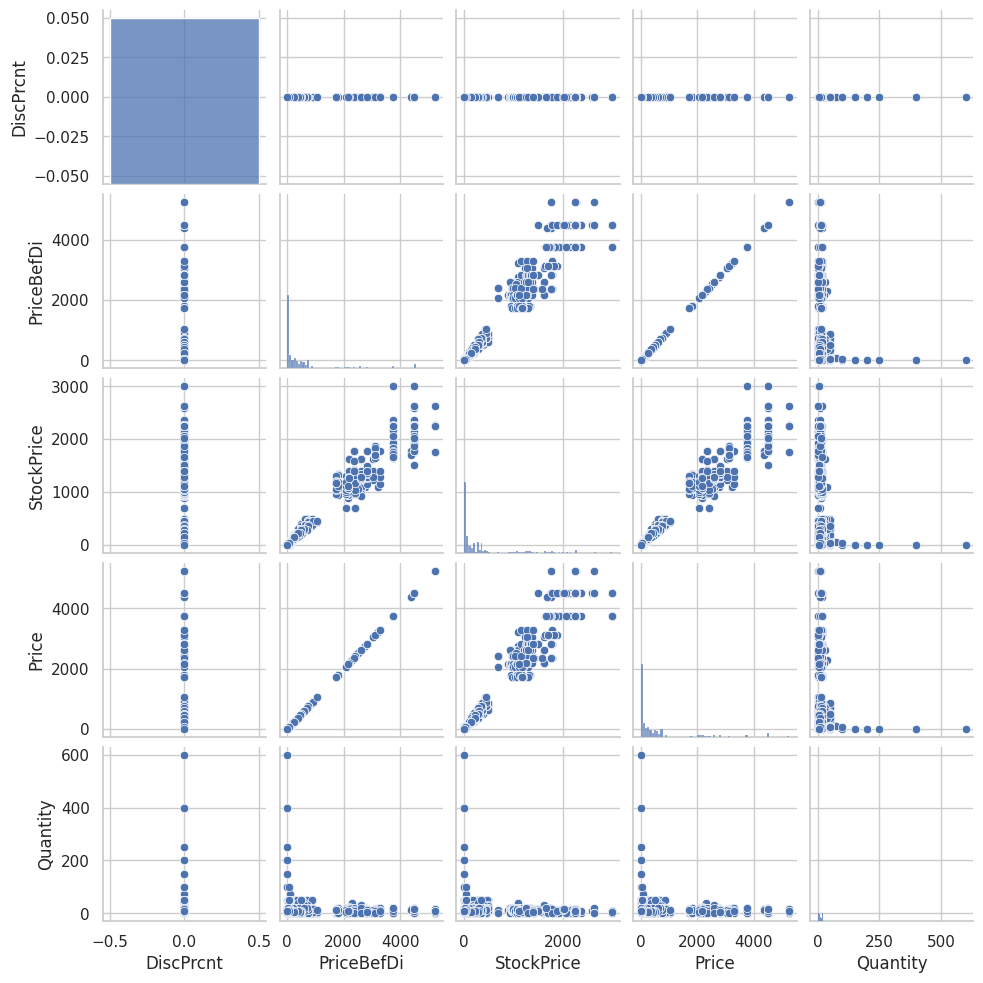

In [36]:
# Correlation Matrix Plot
sns.set(style='whitegrid', context='notebook')
cols = ['DiscPrcnt', 'PriceBefDi', 'StockPrice', 'Price', 'Quantity']
sns.pairplot(df[cols], height=2)

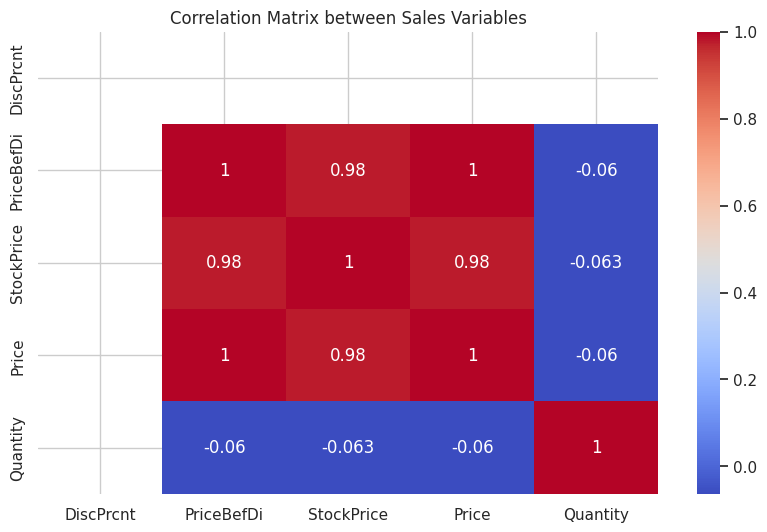

In [37]:
## Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[cols].corr(), cbar= True,  cmap='coolwarm', annot= True)
plt.title('Correlation Matrix between Sales Variables')
plt.show()

The chart shows a correlation matrix between the variables DiscPrcnt, PriceBefDi, StockPrice, Price, and Quantity.

1. **High correlation between PriceBefDi, StockPrice, and Price:**

These three variables are strongly correlated (0.98 to 1.0), indicating that as one value increases, the others do as well, almost proportionally. This makes sense, as the price before discount (PriceBefDi) and the final price (Price) are closely related, and the stock price (StockPrice) also influences the sale price.

2. **Low correlation between Quantity and other variables:**

The quantity sold (Quantity) is not strongly correlated with other variables such as Price, StockPrice, or DiscPrcnt. This might suggest that the quantities sold are not heavily dependent on prices or discounts, which could require deeper analysis.

3. **Weak relationship between DiscPrcnt and other variables:**

The discount percentage (DiscPrcnt) does not have a strong correlation with the other variables, indicating that discounts don't have a significant impact on price or the quantity sold in this particular case.

# **SPRING 2**

# 4. Modeling Approach <a class="anchor" id="model-dev"></a>

We will continue with the analysis of the products and establish the necessary models that will help us identify purchasing patterns of the products and define a demand prediction model that will allow us to anticipate the optimal quantities to have in stock to meet that demand.

For this, we will focus on the Top 5 items, and here arises the main question: the Top 5 items based on total billing (monetary value) or the Top 5 items based on the quantities sold.

* If the focus is financial (maximizing revenue, profitability), the products with the highest total sales would be the most suitable.
* If the focus is operational (managing inventory flow), you should opt for the products with the highest quantities sold.

For this project, the focus will be operational, as we are interested in anticipating the demand for products that, in practice, tend to have high turnover, which involves making decisions about purchasing times, early management with suppliers, and storage capacity. This is usually more chaotic with high-turnover products.

Creating a new Dataframe with the information of the Top 5 products with the highest rotation

In [38]:
# Grouping by product code and description and add up by quantity sales
sales_per_qty = df.groupby(['ItemCode', 'ItemName'])['Quantity'].sum().reset_index()
top5_products_per_qty = sales_per_qty.sort_values(by='Quantity', ascending=False).head(5)

# Creating a new dataframe, filtering the original DataFrame to include only the top 5 best-selling products
df_top5_products_per_qty = df[df['ItemCode'].isin(top5_products_per_qty['ItemCode'])]
df_top5_products_per_qty.head()

,DocEntry,DocNum,CardCode,CardName,GroupCode,GroupName,Country,CountryName,State1,StateName,...,ItmsGrpCod,ItmsGrpNam,ItemName,Quantity,WhsCode,StockPrice,PriceBefDi,DiscPrcnt,Price,LineTotal
3,1,1,C20000,Norm Thompson,103,Distributors,US,USA,PA,Pennsylvania,...,102,Rainbow Printers,Rainbow Color Printer 5.0,5,1,486.020000,750.00,0,750.00,3750.0
4,1,1,C20000,Norm Thompson,103,Distributors,US,USA,PA,Pennsylvania,...,102,Rainbow Printers,Rainbow Color Printer 7.5,5,1,385.220000,600.00,0,600.00,3000.0
6,2,2,C30000,Microchips,102,Large Accounts,US,USA,NY,New York,...,100,Items,Printer Label,200,1,0.727035,1.25,0,1.25,250.0
10,4,4,C23900,Parameter Technology,106,High Tech,US,USA,PA,Pennsylvania,...,101,J.B. Printers,Memory Chip,10,1,49.175824,75.00,0,75.00,750.0
14,5,5,C42000,Mashina Corporation,103,Distributors,US,USA,OH,Ohio,...,102,Rainbow Printers,Rainbow Color Printer 5.0,5,1,486.019652,625.00,0,625.00,3125.0


In [39]:
# Table showing the quantity sold per product for every year
# Grouping by date (year) and product, and add by quantity sales
sales_top5_qyt_time = df_top5_products_per_qty.groupby([df['DocDate'].dt.to_period('Y') ,'ItemName'])['Quantity'].sum().unstack()
sales_top5_qyt_time

ItemName,Memory Chip,Printer Label,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,,
2006,355.0,1650.0,156.0,178.0,173.0
2007,300.0,1650.0,36.0,97.0,263.0
2008,NaN,NaN,20.0,32.0,15.0
2009,NaN,NaN,41.0,39.0,29.0
2010,NaN,NaN,15.0,31.0,25.0
2011,4.0,NaN,6.0,18.0,10.0
2012,8.0,NaN,3.0,15.0,10.0
2013,32.0,NaN,91.0,99.0,30.0
2014,142.0,NaN,178.0,198.0,141.0


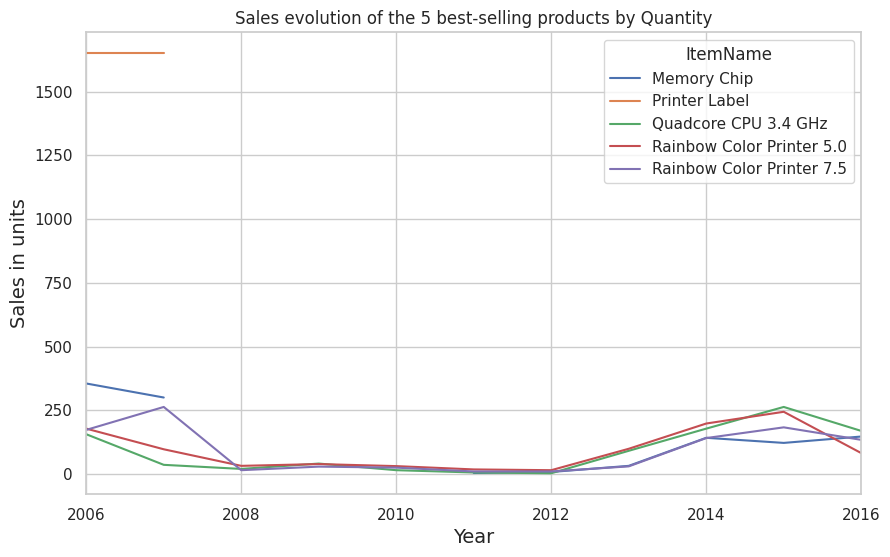

In [40]:
# Graph the evolution of sales of the 5 best-selling products by Quantity
sales_top5_qyt_time.plot(figsize=(10, 6), title='Sales evolution of the 5 best-selling products by Quantity')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in units', fontsize=14)
plt.show()

After filtering the top 5 most sold products, it is evident that the product 'Printer Label' only recorded sales in 2006 and 2007, with no further transactions thereafter.

For this reason, it was decided to exclude it from the analysis as it represents an outlier in the data.

Additionally, sales prior to 2012 do not show much activity, so it was decided to remove them and keep a DataFrame with sales from 2012 to 2016, where there is a noticeable increase in transaction volume.

In [41]:
# Dropping 'Printer Label' from the Dataframe and assigned to a new df
df_top4_products_per_qty = df_top5_products_per_qty.drop(df_top5_products_per_qty[df_top5_products_per_qty['ItemCode'] == 'B10000'].index)

# Filter dates greater than or equal to '2012-01-01'
df_top4_products_per_qty = df_top4_products_per_qty[df_top4_products_per_qty['DocDate'] >= '2012-01-01']
df_top4_products_per_qty.head()

,DocEntry,DocNum,CardCode,CardName,GroupCode,GroupName,Country,CountryName,State1,StateName,...,ItmsGrpCod,ItmsGrpNam,ItemName,Quantity,WhsCode,StockPrice,PriceBefDi,DiscPrcnt,Price,LineTotal
1013,309,309,C30000,Microchips,102,Large Accounts,US,USA,NY,New York,...,101,J.B. Printers,Memory Chip,5,1,37.69,62.5,0,62.5,312.5
1017,313,313,C42000,Mashina Corporation,103,Distributors,US,USA,OH,Ohio,...,102,Rainbow Printers,Rainbow Color Printer 7.5,4,1,281.49,500.0,0,500.0,2000.0
1031,319,319,C40000,Earthshaker Corporation,102,Large Accounts,US,USA,CA,California,...,101,J.B. Printers,Memory Chip,3,1,37.75,62.5,0,62.5,187.5
1051,325,325,C23900,Parameter Technology,106,High Tech,US,USA,PA,Pennsylvania,...,102,Rainbow Printers,Rainbow Color Printer 7.5,5,1,281.49,600.0,0,600.0,3000.0
1053,325,325,C23900,Parameter Technology,106,High Tech,US,USA,PA,Pennsylvania,...,102,Rainbow Printers,Rainbow Color Printer 5.0,4,1,368.26,750.0,0,750.0,3000.0


After dropping 'Printer Label' from the Dataframe and only maintain records greater than year 2012, plotting again the sales of the Top 4 items from 2012 to 2016

In [42]:
# Grouping by date (year) and product, and add by quantity sales
sales_top4_qyt_time = df_top4_products_per_qty.groupby([df['DocDate'].dt.to_period('Y') ,'ItemName'])['Quantity'].sum().unstack()
sales_top4_qyt_time

ItemName,Memory Chip,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,
2012,8,3,15,10
2013,32,91,99,30
2014,142,178,198,141
2015,122,263,244,183
2016,147,169,82,134


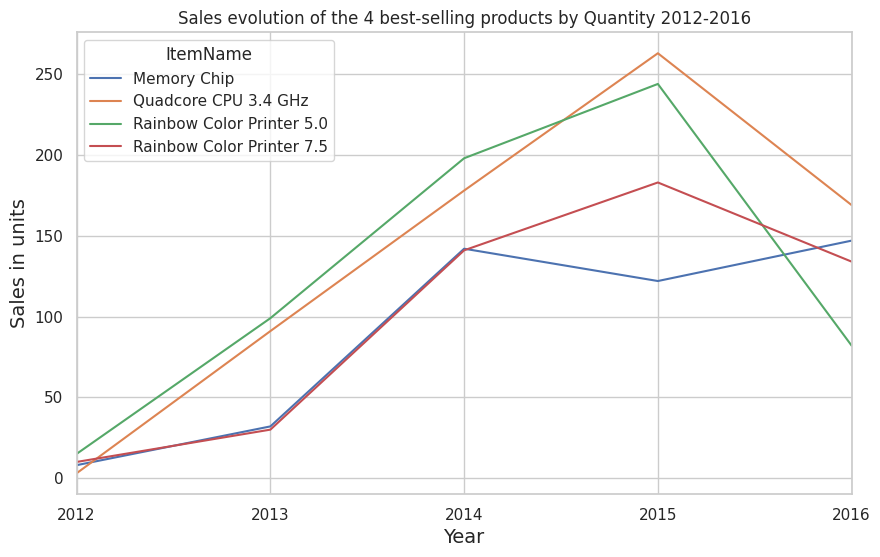

In [43]:
# Graph the evolution of sales of the 4 best-selling products by Quantity
sales_top4_qyt_time.plot(figsize=(10, 6), title='Sales evolution of the 4 best-selling products by Quantity 2012-2016')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales in units', fontsize=14)
plt.show()

We now have a DataFrame of the Top 4 products with the highest sales volume, which will be the focus of our analysis.

As observed, starting from 2012, sales show an upward trend, with quantities sold increasing and reaching their peak in 2015, followed by a decline in 2016.

We will focus on these items for a more in-depth analysis.

## Projected Inventory Based on Averages <a class="anchor" id="avg-projected"></a>

To project the inventory required for the year 2017, two methods will be used:

* **Simple Average Method:** This approach calculates the average percentage increase in sales for each item over the available years, and then uses this average rate to estimate the projected inventory for 2017.

* **Weighted Average Method:** This method focuses on the most recent years, 2015 and 2016, assigning more weight to the more recent data, making the projection for 2017 more reflective of the latest trends in sales.

Both methods will help provide a range of potential inventory needs based on historical sales performance.

In [44]:
# Creating a new DataFrame with only the records from 2015 and 2016
sales_increment2017 = df_top4_products_per_qty[df_top4_products_per_qty['DocDate'] >= '2015-01-01']
sales_increment2017 = sales_increment2017.groupby([df['DocDate'].dt.to_period('Y') ,'ItemName'])['Quantity'].sum().unstack()
sales_increment2017

ItemName,Memory Chip,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,
2015,122,263,244,183
2016,147,169,82,134


### Projected Inventory based on Simple Average:

In [45]:
# Calculate the average of the quantities sold for the last two years. (2015 y 2016)
sales_increment2017_simple = sales_increment2017.copy(deep=True)
simple_avg_2017 = sales_increment2017_simple.loc[['2015', '2016']].mean()
simple_avg_2017

,0
ItemName,
Memory Chip,134.5
Quadcore CPU 3.4 GHz,216.0
Rainbow Color Printer 5.0,163.0
Rainbow Color Printer 7.5,158.5


In [46]:
# Add the new row to DataFrame with the projected year '2017' and the calculated simple average value for every product
sales_increment2017_simple.loc['2017'] = simple_avg_2017.values
# Table showing the projected quantities
sales_increment2017_simple

ItemName,Memory Chip,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,
2015,122.0,263.0,244.0,183.0
2016,147.0,169.0,82.0,134.0
2017,134.5,216.0,163.0,158.5


### Projected Inventory based on Weighted Average:

In [47]:
# Copy the df
sales_increment2017_weighted = sales_increment2017.copy(deep=True)
# Defining weights for every year
weight_2015 = 1
weight_2016 = 2

# Calculate the weighted average between every year
weighted_average_2017 = (sales_increment2017_weighted.loc['2015'] * weight_2015 + sales_increment2017_weighted.loc['2016'] * weight_2016) / (weight_2015 + weight_2016)

# Add the new row to the DataFrame with the projected year '2017' and the calculated weighted average for every product
sales_increment2017_weighted.loc['2017'] = weighted_average_2017

# Table showing the projected quantities
sales_increment2017_weighted

ItemName,Memory Chip,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,
2015,122.000000,263.000000,244.0,183.000000
2016,147.000000,169.000000,82.0,134.000000
2017,138.666667,200.333333,136.0,150.333333


According to the projected inventory information from the two methods, we can see that the weighted average method is somewhat more conservative in the values, as it gives greater weight to the quantities from 2016.

For example, for the item 'Rainbow Color Printer 5.0', the projected quantity for 2017 using the simple average method is 163, while the weighted average method yields 136.

Since sales in 2016 were 66% lower than in 2015, the projection is adjusted for 2017, resulting in a more conservative value.

This is a projected total value per year, not considering trends or seasonality.


Using averages either simple or weighted to project values, such as inventory for the year 2017, has several advantages, but also has some disadvantages.

Some of the main disadvantages:

1. **Loss of detailed information:** Averages can obscure significant variations in the data, leading to projections that do not accurately reflect actual sales behavior.

2. **Does not consider trends and seasonality:** This method does not take into account long-term trends or seasonal patterns, which can result in inaccurate projections if sales fluctuate based on these factors.

3. **Assumption of constant behavior:** The use of averages assumes that past behavior will continue into the future, which may not be true in a changing market environment.

Improved options that can be applied to project inventory instead of using a purely average-based approach may include the following:

* Linear regression models to model the relationship between sales and other factors.

* Machine learning methods such as decision trees and random forests.

* Time series analysis, using techniques such as exponential smoothing or time series decomposition to identify patterns, trends, and seasonality.

## Linear Regression for Inventory Projected <a class="anchor" id="lr-projected"></a>

The approach to applying linear regression in this case will be to predict the quantities of products that will be sold in 2017 based on the historical sales trend. Linear regression will allow us to model the relationship between previous years (as the independent variable) and quantities sold (as the dependent variable) to project future demand.

The strategy will involve fitting a regression line for each of the selected products, using sales data from previous years (2012 to 2016), and then extrapolating this model to estimate the expected quantities for 2017.

The main steps will include:

1. **Data Preparation:** Use the years as the independent variable (X) and quantities sold as the dependent variable (y) for each product.
2. **Model Training:** Apply linear regression to the historical data for each product.
3. **Prediction:** Use the fitted model to predict the sales quantity for 2017.

This will provide an estimate based on the trends from the last few years and will help us compare with the projections based on simple statistical methods (simple and weighted averages).


**Step 1:** Prepare the data

We are going to work with sales data between 2012 and 2016, using the years as the independent variable and the quantities sold of the products as the dependent variable.



**Step 2:** Apply Linear Regression

We are going to train the model for each product using LinearRegression from scikit-learn.

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Filtering the dataset for years starting from 2012
df_sales_linear = df_top4_products_per_qty[df_top4_products_per_qty['DocDate'].dt.year >= 2012]

# Create the DataFrame of quantities sold grouped by year
sales_top4_qyt_time = df_sales_linear.groupby([df_sales_linear['DocDate'].dt.year, 'ItemName'])['Quantity'].sum().unstack()
sales_top4_qyt_time

ItemName,Memory Chip,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,
2012,8,3,15,10
2013,32,91,99,30
2014,142,178,198,141
2015,122,263,244,183
2016,147,169,82,134


In [50]:
# Create the independent variable X (years)
years = np.array(sales_top4_qyt_time.index).reshape(-1, 1)  # Extracts the index from the DataFrame 'sales_top4_qyt_time'. This index corresponds to the years, and converts them into a Numpy array.

# Dictionary to save predictions for each product
prediction_2017 = {}

# Create and train the linear regression model for each product
for product in sales_top4_qyt_time.columns:

    y = sales_top4_qyt_time[product].values  # Define the dependent variable y (quantities sold)

    model = LinearRegression() # Instantiate the model
    model.fit(years, y) # Training the model

    pred_2017 = model.predict([[2017]])  # Predict the amount of sales for the year 2017
    prediction_2017[product] = int(pred_2017[0])

In [51]:
# Showing the projections
print(prediction_2017)

{'Memory Chip': 200, 'Quadcore CPU 3.4 GHz': 292, 'Rainbow Color Printer 5.0': 211, 'Rainbow Color Printer 7.5': 219}


In [52]:
# Add the new row to the DataFrame with the projected year '2017' and the calculated weighted average for every product
sales_top4_qyt_time.loc['2017'] = prediction_2017
sales_top4_qyt_time

ItemName,Memory Chip,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,
2012,8,3,15,10
2013,32,91,99,30
2014,142,178,198,141
2015,122,263,244,183
2016,147,169,82,134
2017,200,292,211,219


In this case, applying the linear regression model over simple average and weighted average models is advantageous because linear regression doesn't just focus on recent numbers but looks at how sales have changed over the years. This helps to better predict whether sales are increasing or decreasing.

Is also more accurate with fluctuations. if sales rise and fall a lot, linear regression can find a "middle path" that follows the overall trend. Simple averages might be misleading when there are drastic changes in certain years.

Main disadvantages of linear regression is that it assumes sales rise or fall consistently, which might not always be true.

Linear regression assumes that the relationship between the dependent variable sales and time is linear, which may not be true in all cases if sales fluctuate non-linearly.

Linear regression works best with long time series or where there is enough data to detect a trend.

## Decision Tree <a class="anchor" id="tree-projected"></a>

This model would be useful when sales do not follow a linear trend and may be influenced by multiple factors.

In [53]:
# Creating a new DataFrame with only the records from 2012 and 2016
df_top4_rf_time = df_top4_products_per_qty[df_top4_products_per_qty['DocDate'] >= '2012-01-01']
df_top4_rf_time = df_top4_rf_time.groupby([df['DocDate'].dt.to_period('Y') ,'ItemName'])['Quantity'].sum().unstack()
df_top4_rf_time

ItemName,Memory Chip,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,
2012,8,3,15,10
2013,32,91,99,30
2014,142,178,198,141
2015,122,263,244,183
2016,147,169,82,134


In [54]:
from sklearn.tree import DecisionTreeRegressor

# Creating a new dataframe with the records from 2012
df_sales_tree = df_top4_products_per_qty[df_top4_products_per_qty['DocDate'].dt.year >= 2012]

# Grouping the dataframe per year
sales_top4_qyt_time = df_sales_tree.groupby([df_sales_tree['DocDate'].dt.year, 'ItemName'])['Quantity'].sum().unstack()

# Independent variable X (years)
years = np.array(sales_top4_qyt_time.index).reshape(-1, 1)

# Dictionary to save the prediction values for each product
prediction_2017_tree = {}

# Decision tree for predict sales of each item
for product in sales_top4_qyt_time.columns:
    y = sales_top4_qyt_time[product].values  # dependent variable y

    # Instantiating and Training the model
    tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)
    tree_model.fit(years, y)

    # Predict sales for 2017
    pred_2017 = tree_model.predict([[2017]])
    prediction_2017_tree[product] = int(pred_2017[0])  # Append prediction in the dictionary

# Showing predictions
print(prediction_2017_tree)

# Adding a new row to the dataframe with the new year predicted '2017'
sales_top4_qyt_time.loc[2017] = prediction_2017_tree
sales_top4_qyt_time

{'Memory Chip': 147, 'Quadcore CPU 3.4 GHz': 169, 'Rainbow Color Printer 5.0': 82, 'Rainbow Color Printer 7.5': 134}


ItemName,Memory Chip,Quadcore CPU 3.4 GHz,Rainbow Color Printer 5.0,Rainbow Color Printer 7.5
DocDate,,,,
2012,8,3,15,10
2013,32,91,99,30
2014,142,178,198,141
2015,122,263,244,183
2016,147,169,82,134
2017,147,169,82,134


However, if there is not enough variability in the training data (the quantities sold do not change much from year to year), the decision tree may not find significant splits and simply assign the last observed value (in this case, 2016) as the prediction for 2017.

In this case, it would not be a viable model to apply for projecting sales

# **SPRING 3**

# 5. Model Improvement <a class="anchor" id="model-imp"></a>

To improve the model, we will perform a training process by splitting the data into a training set and a testing set.

We will select the training set from the years 2006 to 2015, and the model will be used to predict the year 2016 as the testing set.

The model will be evaluated using
* Mean Squared Error (MSE),
* Mean Absolute Error (MAE) and,
* R² Score.

Finally, to ensure that the regression model is not overfitted, we will perform cross-validation technique.

Given that projecting annual sales can be highly variable, we will break down the data into months with the goal of predicting only the first quarter of 2017.

While we will keep the projected annual value as a reference, our focus will be on estimating the inventory needed for the first quarter of the year.

Finally, we will introduce an ARIMA model to compare its projections with those of the other models

